# <b>機械学習の基礎-2</b>

ここからは主に機械学習の主要タスクである分類/識別(classification)、クラスタリング(clustering)について記す。  
これらは回帰よりも使われることが多い。  

本ドキュメントの参考資料：  
* 米国データサイエンティストのブログ　https://datawokagaku.com/
* Udemy「【後編】米国データサイエンティストがやさしく教える機械学習超入門【Pythonで実践】」

## ○ 分類/識別(Classification)
カテゴリーやクラス、ラベルと呼ばれる”種類”を判別する。  
例えばある物件の駐車場の有無を家賃と広さから予測するなど。  
応用例として、医用画像診断、迷惑メールフィルタ、顔認証、音声認識などがある。  

回帰と違い、目的変数が質的変数になる (回帰では目的変数が量的変数)。  
分類タスクでは、決定境界（例：駐車場の有無でデータ群を2分する境界）を作ってデータを分類することを目的とする。  
決定境界を引く機械学習モデルを分類器(classifier、読み方：クラシファイアー)という。  

左図：線形の分類器の例　右図：非線形の分類器の例  
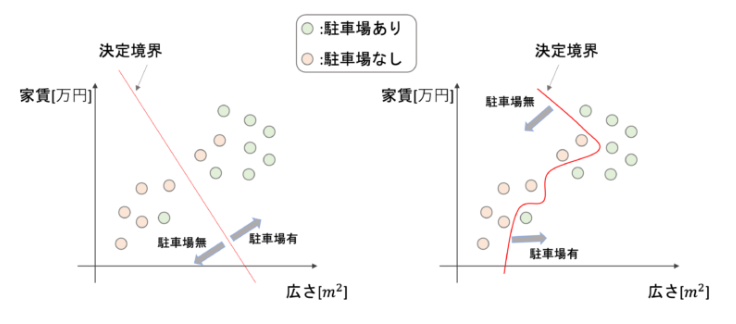  

下記の理由により、目的変数を0/1の2値としてそれを回帰モデルから予測することは分類のアルゴリズムとしては不適切。  
* 回帰では予測値が0~1の範囲を超えてしまうことがあり、解釈できないためそのままでは使えない。
* 多クラスの場合（例：赤、青、緑）、それぞれ0, 1, 2…の様に単純に数値化して量的変数のようにすることはできない。  
  これは本来であれば赤、青、緑は値として等価であるにもかかわらず、0,1,2のように差がある扱いになってしまうため。
* また、目的変数が2値しかないため、外れ値一つ（例：超家賃高くて広いのに駐車場なしなど）で大きく回帰曲線が変わり、分類結果が変わってしまう  

そこで、少なくとも特徴量に対する予測の結果が0~1の間にあればどちらかといえば0,1などが言える（解釈可能）ので、  
このようなアルゴリズムを分類アルゴリズムとして採用する。  
→ロジスティック回帰（一例）


参考：https://datawokagaku.com/logistic_reg/

## ○ ロジスティック回帰
分類アルゴリズムの最も基本的なアルゴリズム。  
「回帰」と付いているが、分類のアルゴリズムであることに注意。  
（由来はロジスティック回帰の中で回帰モデルを使用するからである）  

ロジスティック回帰にはシグモイド関数（別名：ロジスティック関数）を使う。  
$$z = \frac {1}{1+e^{-x}}$$

シグモイド関数は負の無限大で0、正の無限大で1に限りなく近づき、どのような$x$に対しても0~1の値をとる。  
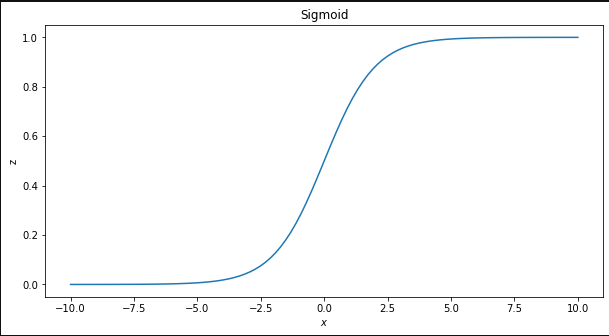  

したがって、"線形"回帰モデル$\hat{f}(x)$をシグモイド関数の$x$に入れることで、回帰モデルの予測結果を0～1に変換することができる。  
このとき、ロジスティック回帰の数式モデル$p(x)$ (※probabilityのp)を下記で表わす。  
$$p(x) = \frac {1}{1+e^{-(\hat{f}(x))}}$$

こうすることで回帰モデルの予測結果は0～1に変換されるので、これを目的変数の2値をとり得る確率として解釈する。  
※正確には2値のうちの1をとる確率を表す。

※ロジスティック回帰に使う回帰モデルは線形回帰モデルを前提としている。  
シグモイド関数を見ると非線形のモデルに見えるが、ロジスティック回帰は線形モデルの分類器である。  
（線形回帰モデルからの予測値の大きさが0,1どちらかに近いかで分類しているため、直線的な決定境界になる）
$$\hat{f}(X)=\theta_0+\theta_1X_1+\theta_2X_2+ ... \theta_nX_n$$  
特徴量が一つであれば、ロジスティック回帰モデルは下記になる。
$$p(x) = \frac {1}{1+e^{-(\theta_0+\theta_1X_1)}}$$
参考：https://ja.wikipedia.org/wiki/%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0

### - ロジスティック回帰の損失関数
回帰モデルと同様にパラメタ$\theta$を求めるための損失関数がロジスティック回帰でも必要。  
真の値$y_i$が0または1の2値をとり、ロジスティック回帰のモデルによる予測値$p(x)$は0～1の値をとるので、  
例えば、ある学習データにおける特徴量に対する予測値が$p(x)=0.3$で、真の値が1だった場合は予測値と真の値が異なっているので、  
損失がある言える。  
$p(x)$は線形回帰モデルに比べて複雑なため、残差の二乗和を損失関数としてこれを最小化するアルゴリズムである最小二乗法では上手く収束しない。  
よって残差ではなく下記のように表される <b>Log Loss(交差エントロピー(cross entropy)ともいう)</b> を損失の評価に使用する。  

* Log Loss  
$Cost(p(x_i),y_i) = \left\{
\begin{array}{ll}
-log(p(x_i)) & (If　y_i=1)\\
-log(1-p(x_i)) & (If　y_i=0)
\end{array}
\right. $  

↓（別の表現。１式にまとめることもできる）  
$Cost(p(x_i),y_i) = -\lbrace y_ilog(p(x_i))+(1-y_i)log(1-p(x_i)) \rbrace$  

ロジスティック回帰の損失関数としては、全データのLog Lossを平均（または合計）したものを使用し、  
これに対して最急降下法でパラメタを求める。（最急降下法以外にも求める方法はある）  
最急降下法の偏微分係数については講義スライド参照。  
$$L(\theta)=\frac {1}{m}\sum_{i=1}^m Cost(p(x_i),y_i)= -\frac {1}{m}\sum_{i=1}^m  \lbrace y_ilog(p(x_i))+(1-y_i)log(1-p(x_i)) \rbrace$$


Log Lossのグラフは下記のようになる。上図が真の値が1のとき、下図が0のとき。  
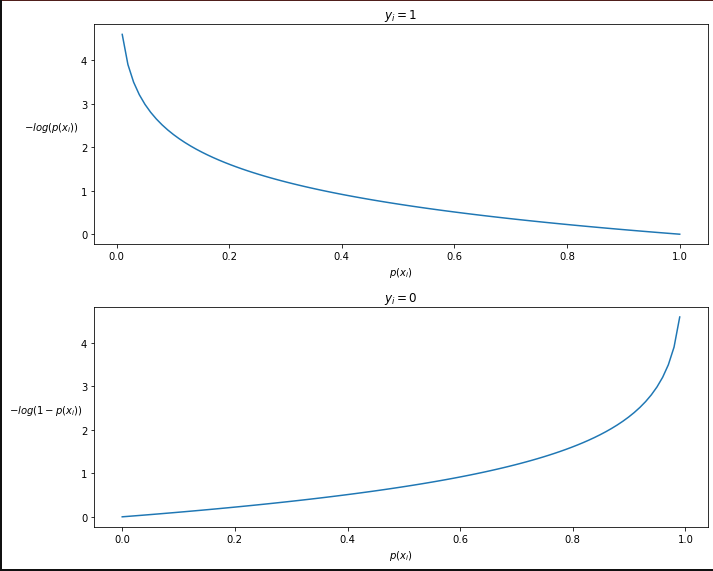  


## ○ 多クラス分類のロジスティック回帰
実際に分類すべき対象は2値（2クラス）であるとは限らず、青赤緑のように2値よりも多いクラスに分類が必要なケースが多い。  
上記までのロジスティック回帰は2クラス分類を前提としていたが、ここからは2クラスよりも多いクラスに分類するモデルについて記す。  
大きく分けて次の2手法がある。2手法で分類結果が異なることに注意。  
* One vs Rest(OvR)
* 多項ロジスティック回帰 (Multinomial logistic regression)

### - One vs Rest(OvR)
クラスの数だけ分類器を作り最も確率が高いクラスを最終的な分類結果とする。  
ロジスティック回帰に限らず他のモデルでも使われる最も一般的な手法である。  
データ数が多かったりモデル構築にコストがかかる場合は適さない。  

例）赤青黄の3クラスに分類する場合
* 赤とそれ以外に2値分類する分類器
* 青とそれ以外に2値分類する分類器
* 黄とそれ以外に2値分類する分類器

を作成し、  
あるテストデータ1つに対してそれぞれの分類器を適用した結果、最も確率が高い色を最終的な分類結果として採用する。  


### - 多項ロジスティック回帰 (Multinomial logistic regression)
2値分類用の損失関数を多クラス対応させたものであり、一度の学習で多クラスに対応するモデルを構築可能である。  
